# ANN ( SALARY STATUS PREDICTION)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

# **Reading the dataset**

In [5]:
df=pd.read_csv("1659543803income-iitm-1.csv")

In [6]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [8]:
df["JobType"].unique()

array([' Private', ' Federal-gov', ' ?', ' Self-emp-inc',
       ' Self-emp-not-inc', ' Local-gov', ' State-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
ob_features_names=[i for i,j in zip(df.dtypes.index,df.dtypes.values) if j=="object"]
ob_features_names

['JobType',
 'EdType',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'gender',
 'nativecountry',
 'SalStat']

In [10]:
df.isnull().sum()

,0
age,0
JobType,0
EdType,0
maritalstatus,0
occupation,0
relationship,0
race,0
gender,0
capitalgain,0
capitalloss,0


# Feature **Engineering**

# OUTLIER TREATMENT

In [11]:
df_o=df.copy()

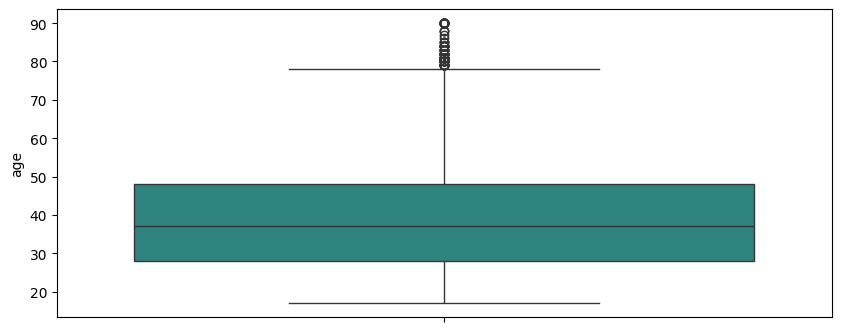

In [12]:
plt.figure(figsize=(10,4))
sns.boxplot(y=df_o["age"],palette="viridis")
plt.show()

In [13]:
q1=df_o["age"].quantile(.25)
q1

28.0

In [14]:
q3=df_o["age"].quantile(.75)
q3

48.0

In [15]:
iqr=q3-q1
iqr

20.0

In [16]:
lower_fence=q1-(1.5*iqr)
lower_fence

-2.0

In [17]:
upper_fence=q3+(1.5*iqr)
upper_fence

78.0

In [18]:
df_o["SalStat"].unique()

array([' less than or equal to 50,000', ' greater than 50,000'],
      dtype=object)

In [19]:
df_o.loc[df["age"]>65]

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
32,67,Private,Assoc-voc,Divorced,Other-service,Not-in-family,White,Female,0,0,24,United-States,"less than or equal to 50,000"
57,72,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,0,0,20,United-States,"less than or equal to 50,000"
85,74,Private,Some-college,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,9,United-States,"less than or equal to 50,000"
92,67,Private,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,48,United-States,"greater than 50,000"
110,72,Private,11th,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31854,77,Self-emp-not-inc,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31862,76,Self-emp-not-inc,Masters,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,"less than or equal to 50,000"
31867,66,Private,HS-grad,Never-married,Transport-moving,Not-in-family,White,Male,2050,0,55,United-States,"less than or equal to 50,000"
31884,67,?,11th,Married-civ-spouse,?,Husband,White,Male,0,0,8,United-States,"less than or equal to 50,000"


In [20]:
df_o.loc[(df_o["age"]>66 ) & (df_o["SalStat"]==" less than or equal to 50,000")]

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
32,67,Private,Assoc-voc,Divorced,Other-service,Not-in-family,White,Female,0,0,24,United-States,"less than or equal to 50,000"
57,72,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,0,0,20,United-States,"less than or equal to 50,000"
85,74,Private,Some-college,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,9,United-States,"less than or equal to 50,000"
110,72,Private,11th,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,"less than or equal to 50,000"
113,69,Private,11th,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31769,75,Private,Assoc-voc,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,20,Columbia,"less than or equal to 50,000"
31854,77,Self-emp-not-inc,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31862,76,Self-emp-not-inc,Masters,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,"less than or equal to 50,000"
31884,67,?,11th,Married-civ-spouse,?,Husband,White,Male,0,0,8,United-States,"less than or equal to 50,000"


In [21]:
df_o=df_o.loc[(df_o["age"]>17) & (df_o["age"]<=65)]

In [22]:
df_o.shape

(30443, 13)

In [23]:
df_o.reset_index(drop=True,inplace=True)

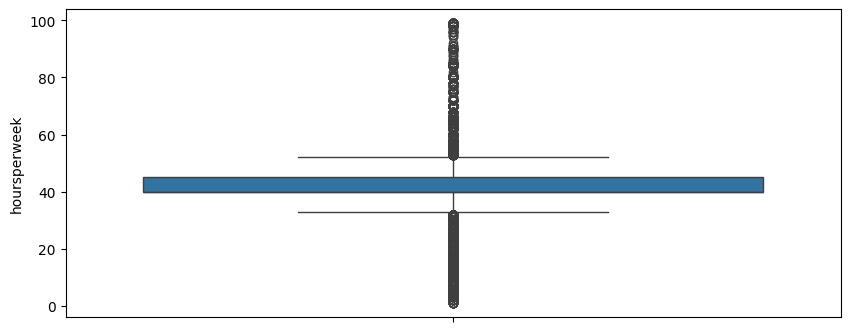

In [24]:
plt.figure(figsize=(10,4))

sns.boxplot(y=df_o["hoursperweek"])
plt.show()

In [25]:
q1=df_o["hoursperweek"].quantile(.25)

In [26]:
q3=df_o["hoursperweek"].quantile(.75)

In [27]:
q3

45.0

In [28]:
lf=q1-1.5*(q3-q1)

In [29]:
lf

32.5

In [30]:
uf=q3+1.5*(q3-q1)

In [31]:
uf

52.5

In [32]:
 df_o.groupby(df_o["SalStat"])["hoursperweek"].median()

,hoursperweek
SalStat,
"greater than 50,000",40.0
"less than or equal to 50,000",40.0


In [33]:
 df_o.groupby(df_o["SalStat"])["hoursperweek"].describe()

,count,mean,std,min,25%,50%,75%,max
SalStat,,,,,,,,
"greater than 50,000",7466.0,45.766676,10.699297,1.0,40.0,40.0,50.0,99.0
"less than or equal to 50,000",22977.0,39.573748,11.713987,1.0,38.0,40.0,40.0,99.0


In [34]:
df_o.loc[df_o["hoursperweek"]<32.5]

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
21,24,Private,Bachelors,Never-married,Tech-support,Not-in-family,White,Female,0,0,20,United-States,"less than or equal to 50,000"
26,30,Private,Bachelors,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,16,United-States,"greater than 50,000"
32,22,Private,Some-college,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,30,United-States,"less than or equal to 50,000"
36,43,Self-emp-not-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,20,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30412,46,Self-emp-not-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,25,United-States,"less than or equal to 50,000"
30415,41,Local-gov,Some-college,Divorced,Other-service,Not-in-family,Black,Female,0,0,24,United-States,"less than or equal to 50,000"
30422,30,Private,11th,Never-married,Other-service,Own-child,White,Female,0,0,19,United-States,"less than or equal to 50,000"
30425,20,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,30,United-States,"less than or equal to 50,000"


In [35]:
hour=df_o.loc[df_o["hoursperweek"]<32.5]

In [36]:
hour.groupby(hour["SalStat"])["hoursperweek"].describe()

,count,mean,std,min,25%,50%,75%,max
SalStat,,,,,,,,
"greater than 50,000",302.0,22.099338,8.118111,1.0,18.0,24.0,30.0,32.0
"less than or equal to 50,000",4173.0,21.945603,7.349719,1.0,17.0,22.0,30.0,32.0


In [37]:
df_o.loc[(df_o["hoursperweek"]<24) & (df_o["SalStat"]==' greater than 50,000')]

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
26,30,Private,Bachelors,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,16,United-States,"greater than 50,000"
676,65,Private,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,10605,0,20,United-States,"greater than 50,000"
962,61,Private,Prof-school,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,5,United-States,"greater than 50,000"
1236,49,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,White,Female,99999,0,20,United-States,"greater than 50,000"
1382,44,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,18,United-States,"greater than 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29836,36,State-gov,Bachelors,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,"greater than 50,000"
29990,46,Private,Masters,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,22,United-States,"greater than 50,000"
30018,39,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,"greater than 50,000"
30210,58,State-gov,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,"greater than 50,000"


In [38]:
a=df_o.loc[(df_o["hoursperweek"]<24) & (df_o["SalStat"]==' greater than 50,000')]

In [39]:
a

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
26,30,Private,Bachelors,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,16,United-States,"greater than 50,000"
676,65,Private,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,10605,0,20,United-States,"greater than 50,000"
962,61,Private,Prof-school,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,5,United-States,"greater than 50,000"
1236,49,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,White,Female,99999,0,20,United-States,"greater than 50,000"
1382,44,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,18,United-States,"greater than 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29836,36,State-gov,Bachelors,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,"greater than 50,000"
29990,46,Private,Masters,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,22,United-States,"greater than 50,000"
30018,39,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,"greater than 50,000"
30210,58,State-gov,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,"greater than 50,000"


In [40]:
df_new=df_o.drop(a.index)

In [41]:
df_new

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30438,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
30439,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
30440,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
30441,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [42]:
df_new.reset_index(drop=True,inplace=True)

In [43]:
df_new

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30290,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
30291,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
30292,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
30293,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [44]:
df_new.isnull().sum()

,0
age,0
JobType,0
EdType,0
maritalstatus,0
occupation,0
relationship,0
race,0
gender,0
capitalgain,0
capitalloss,0


# HANDLING CATEGORICAL FEATURE

#### Method-1 One Hot Encoding

In [45]:
df_new["JobType"].unique()

array([' Private', ' Federal-gov', ' Self-emp-inc', ' Self-emp-not-inc',
       ' ?', ' Local-gov', ' State-gov', ' Without-pay', ' Never-worked'],
      dtype=object)

In [46]:
df_new.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [47]:
df_new["nativecountry"].nunique()

41

In [48]:
df_new["nativecountry"].value_counts()

,count
nativecountry,
United-States,27593
Mexico,635
Philippines,189
Germany,130
Puerto-Rico,108
Canada,107
El-Salvador,103
India,98
Cuba,85


In [49]:
df_ob_ohc=pd.get_dummies(df_new,drop_first=True,dtype="int")
df_ob_ohc.head()

,age,capitalgain,capitalloss,hoursperweek,JobType_ Federal-gov,JobType_ Local-gov,JobType_ Never-worked,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,"SalStat_ less than or equal to 50,000"
0,45,0,0,28,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,24,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,44,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,27,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,20,0,0,35,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


# Method-2 **Extract the most frequently occurring labels from a colum(specifically for nominal features).**

In [50]:
df_new["nativecountry"].value_counts()

,count
nativecountry,
United-States,27593
Mexico,635
Philippines,189
Germany,130
Puerto-Rico,108
Canada,107
El-Salvador,103
India,98
Cuba,85


In [51]:
df_new["nativecountry"].value_counts().head(5).index

Index([' United-States', ' Mexico', ' Philippines', ' Germany',
       ' Puerto-Rico'],
      dtype='object', name='nativecountry')

In [52]:
top_5=[i for i in df_new["nativecountry"].value_counts().head(5).index]

In [53]:
top_5

[' United-States', ' Mexico', ' Philippines', ' Germany', ' Puerto-Rico']

In [54]:
for i in top_5:
    df_new[i]=np.where(df_new["nativecountry"]== i,1,0)

In [55]:
df_new.head(2)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,United-States,Mexico,Philippines,Germany,Puerto-Rico
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000",1,0,0,0,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000",1,0,0,0,0


In [56]:
df_new["JobType"].value_counts()

,count
JobType,
Private,21460
Self-emp-not-inc,2274
Local-gov,1980
?,1417
State-gov,1243
Self-emp-inc,984
Federal-gov,920
Without-pay,11
Never-worked,6


In [57]:
df_o.loc[df_o["JobType"]==" ?","JobType"]

,JobType
16,?
28,?
39,?
41,?
65,?
...,...
30336,?
30354,?
30361,?
30402,?


In [58]:
df_o["JobType"].mode()[0]

' Private'

In [59]:
df_o.loc[df_o["JobType"]==" ?",["JobType"]]=df_o["JobType"].mode()[0]

In [60]:

df_o.loc[df_o["occupation"]==" ?",["occupation"]]=df_o["occupation"].mode()[0]

In [61]:
df_o["JobType"].value_counts()

,count
JobType,
Private,22972
Self-emp-not-inc,2307
Local-gov,1988
State-gov,1248
Self-emp-inc,989
Federal-gov,922
Without-pay,11
Never-worked,6


In [62]:
top_6=[i for i in df_o["JobType"].value_counts().head(6).index]

In [63]:

top_6

[' Private',
 ' Self-emp-not-inc',
 ' Local-gov',
 ' State-gov',
 ' Self-emp-inc',
 ' Federal-gov']

In [64]:
for i in top_6:
    df_new[i]=np.where(df_new["JobType"]== i,1,0)

In [65]:
df_new.head(2)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,...,Mexico,Philippines,Germany,Puerto-Rico,Private,Self-emp-not-inc,Local-gov,State-gov,Self-emp-inc,Federal-gov
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,...,0,0,0,0,1,0,0,0,0,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
df_o["occupation"].value_counts()

,count
occupation,
Craft-repair,5415
Prof-specialty,3911
Exec-managerial,3851
Adm-clerical,3601
Sales,3372
Other-service,2983
Machine-op-inspct,1936
Transport-moving,1528
Handlers-cleaners,1289


In [67]:
top_11=[i for i in df_new["occupation"].value_counts().head(11).index]

In [68]:
for i in top_11:
    df_new[i]=np.where(df_new["occupation"]==i,1,0)

In [69]:

df_new.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,...,Prof-specialty,Exec-managerial,Adm-clerical,Sales,Other-service,Machine-op-inspct,Transport-moving,?,Handlers-cleaners,Farming-fishing
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,...,0,0,1,0,0,0,0,0,0,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,...,1,0,0,0,0,0,0,0,0,0
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,...,0,0,0,1,0,0,0,0,0,0


In [70]:
df_new["maritalstatus"].value_counts()

,count
maritalstatus,
Married-civ-spouse,13922
Never-married,10013
Divorced,4293
Separated,991
Widowed,674
Married-spouse-absent,380
Married-AF-spouse,22


In [71]:
top_5=[i for i in df_new["maritalstatus"].value_counts().head(5).index]

In [72]:
for i in top_5:
    df_new[i]=np.where(df_new["maritalstatus"]==i,1,0)

In [73]:
df_new["relationship"].value_counts()

,count
relationship,
Husband,12285
Not-in-family,7751
Own-child,4638
Unmarried,3292
Wife,1431
Other-relative,898


In [74]:
top_5=[i for i in df_new["relationship"].value_counts().head(5).index]

In [75]:
for i in top_5:
    df_new[i]=np.where(df_new["relationship"]==i,1,0)

In [76]:
df_new["race"].value_counts()

,count
race,
White,25920
Black,2910
Asian-Pac-Islander,922
Amer-Indian-Eskimo,300
Other,243


In [77]:
top_2=[i for i in df_new["race"].value_counts().head(2).index]

In [78]:
for i in top_2:
    df_new[i]=np.where(df_new["race"]==i,1,0)

In [79]:
df_new.head(2)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,...,Divorced,Separated,Widowed,Husband,Not-in-family,Own-child,Unmarried,Wife,White,Black
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,...,1,0,0,0,1,0,0,0,1,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,...,0,0,0,0,0,1,0,0,1,0


In [80]:
df_new["gender"].unique()

array([' Female', ' Male'], dtype=object)

In [81]:
df_new["gender"]=df_new["gender"].map({' Male':0,' Female':1})

In [82]:
df_new['SalStat'].unique()

array([' less than or equal to 50,000', ' greater than 50,000'],
      dtype=object)

In [83]:
df_final=df_new.copy()

In [84]:
df_new['SalStat']=df_new['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

### Method-2 Ordinal Encoding ( merely for Ordinal feature)

In [85]:
df_new["EdType"].value_counts()

,count
EdType,
HS-grad,9968
Some-college,6961
Bachelors,5024
Masters,1597
Assoc-voc,1324
Assoc-acdm,1033
11th,950
10th,731
7th-8th,533


In [86]:
df_new["EdType"].unique()

array([' HS-grad', ' Some-college', ' 9th', ' Assoc-voc', ' Assoc-acdm',
       ' Bachelors', ' 1st-4th', ' Masters', ' 10th', ' 12th', ' 5th-6th',
       ' 11th', ' Doctorate', ' 7th-8th', ' Prof-school', ' Preschool'],
      dtype=object)

In [87]:
dictionary={' Preschool':1,' 1st-4th':2,' 5th-6th':3,' 7th-8th':4,' 9th':5,' 10th':6, ' 11th':7,' 12th':8,' HS-grad':9, ' Prof-school':10,' Assoc-voc':11,' Assoc-acdm':12,' Some-college':13,' Bachelors':13, ' Masters':14,' Doctorate':15}

In [88]:
df_new["EdType"]=df_new['EdType'].map(dictionary)

In [89]:
df_new.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,...,Divorced,Separated,Widowed,Husband,Not-in-family,Own-child,Unmarried,Wife,White,Black
0,45,Private,9,Divorced,Adm-clerical,Not-in-family,White,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,24,Federal-gov,9,Never-married,Armed-Forces,Own-child,White,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,44,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,27,Private,5,Never-married,Craft-repair,Other-relative,White,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,20,Private,13,Never-married,Sales,Not-in-family,White,0,0,0,...,0,0,0,0,1,0,0,0,1,0


# FEATURE SELECTION

In [90]:
df_new.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat', ' United-States', ' Mexico',
       ' Philippines', ' Germany', ' Puerto-Rico', ' Private',
       ' Self-emp-not-inc', ' Local-gov', ' State-gov', ' Self-emp-inc',
       ' Federal-gov', ' Craft-repair', ' Prof-specialty', ' Exec-managerial',
       ' Adm-clerical', ' Sales', ' Other-service', ' Machine-op-inspct',
       ' Transport-moving', ' ?', ' Handlers-cleaners', ' Farming-fishing',
       ' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated',
       ' Widowed', ' Husband', ' Not-in-family', ' Own-child', ' Unmarried',
       ' Wife', ' White', ' Black'],
      dtype='object')

In [91]:
df_new=df_new.drop(['JobType', 'maritalstatus', 'occupation',
       'relationship', 'race',"nativecountry"],axis=1)

In [92]:
df_new.head()

,age,EdType,gender,capitalgain,capitalloss,hoursperweek,SalStat,United-States,Mexico,Philippines,...,Divorced,Separated,Widowed,Husband,Not-in-family,Own-child,Unmarried,Wife,White,Black
0,45,9,1,0,0,28,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,24,9,0,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,44,13,0,0,0,40,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,27,5,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,20,13,0,0,0,35,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


## EMBEDDED METHOD (Feature Importance test )

In [93]:
from sklearn.ensemble import ExtraTreesClassifier

In [94]:
df_new.isnull().sum()

,0
age,0
EdType,0
gender,0
capitalgain,0
capitalloss,0
hoursperweek,0
SalStat,0
United-States,0
Mexico,0
Philippines,0


In [95]:
x=df_new.drop(["SalStat"],axis=1)

In [96]:
y=df_new["SalStat"]

In [97]:
etc=ExtraTreesClassifier(n_estimators=100)
etc.fit(x,y)

ExtraTreesClassifier()

In [98]:
etc_score=etc.feature_importances_*100
etc_score

array([23.40061288,  9.83322193,  1.75568711,  9.09529291,  3.025111  ,
       13.44399134,  0.92180274,  0.33834095,  0.17222487,  0.14797544,
        0.09011779,  0.86768249,  0.86568551,  0.54760542,  0.42965435,
        0.67252362,  0.54066756,  0.79288583,  2.94220895,  2.9812196 ,
        0.52608863,  0.6574794 ,  1.13105653,  0.54049666,  0.54201133,
        0.22673753,  0.51013379,  0.56042919,  7.8656788 ,  2.87615229,
        0.82490283,  0.19854499,  0.14804886,  4.95404813,  1.27755789,
        1.25798228,  0.60001039,  0.94923379,  0.901722  ,  0.58717237])

In [99]:
score_ETC=pd.DataFrame(etc_score)

In [100]:
x.columns

Index(['age', 'EdType', 'gender', 'capitalgain', 'capitalloss', 'hoursperweek',
       ' United-States', ' Mexico', ' Philippines', ' Germany', ' Puerto-Rico',
       ' Private', ' Self-emp-not-inc', ' Local-gov', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Craft-repair', ' Prof-specialty',
       ' Exec-managerial', ' Adm-clerical', ' Sales', ' Other-service',
       ' Machine-op-inspct', ' Transport-moving', ' ?', ' Handlers-cleaners',
       ' Farming-fishing', ' Married-civ-spouse', ' Never-married',
       ' Divorced', ' Separated', ' Widowed', ' Husband', ' Not-in-family',
       ' Own-child', ' Unmarried', ' Wife', ' White', ' Black'],
      dtype='object')

In [101]:
cols=x.columns
feature_ETC=pd.DataFrame(cols)

In [102]:
feature_ETC

,0
0,age
1,EdType
2,gender
3,capitalgain
4,capitalloss
5,hoursperweek
6,United-States
7,Mexico
8,Philippines
9,Germany


In [103]:
score_ETC

,0
0,23.400613
1,9.833222
2,1.755687
3,9.095293
4,3.025111
5,13.443991
6,0.921803
7,0.338341
8,0.172225
9,0.147975


In [104]:
Final_score_ETC=pd.concat([feature_ETC,score_ETC],axis=1)
Final_score_ETC.columns=["features","ETC_score"]

In [105]:
Final_score_ETC

,features,ETC_score
0,age,23.400613
1,EdType,9.833222
2,gender,1.755687
3,capitalgain,9.095293
4,capitalloss,3.025111
5,hoursperweek,13.443991
6,United-States,0.921803
7,Mexico,0.338341
8,Philippines,0.172225
9,Germany,0.147975


In [106]:



Final_score_ETC=Final_score_ETC.nlargest(20,"ETC_score")
Final_score_ETC

,features,ETC_score
0,age,23.400613
5,hoursperweek,13.443991
1,EdType,9.833222
3,capitalgain,9.095293
28,Married-civ-spouse,7.865679
33,Husband,4.954048
4,capitalloss,3.025111
19,Exec-managerial,2.981220
18,Prof-specialty,2.942209
29,Never-married,2.876152


               features  ETC_score
0                   age  23.400613
5          hoursperweek  13.443991
1                EdType   9.833222
3           capitalgain   9.095293
28   Married-civ-spouse   7.865679
33              Husband   4.954048
4           capitalloss   3.025111
19      Exec-managerial   2.981220
18       Prof-specialty   2.942209
29        Never-married   2.876152


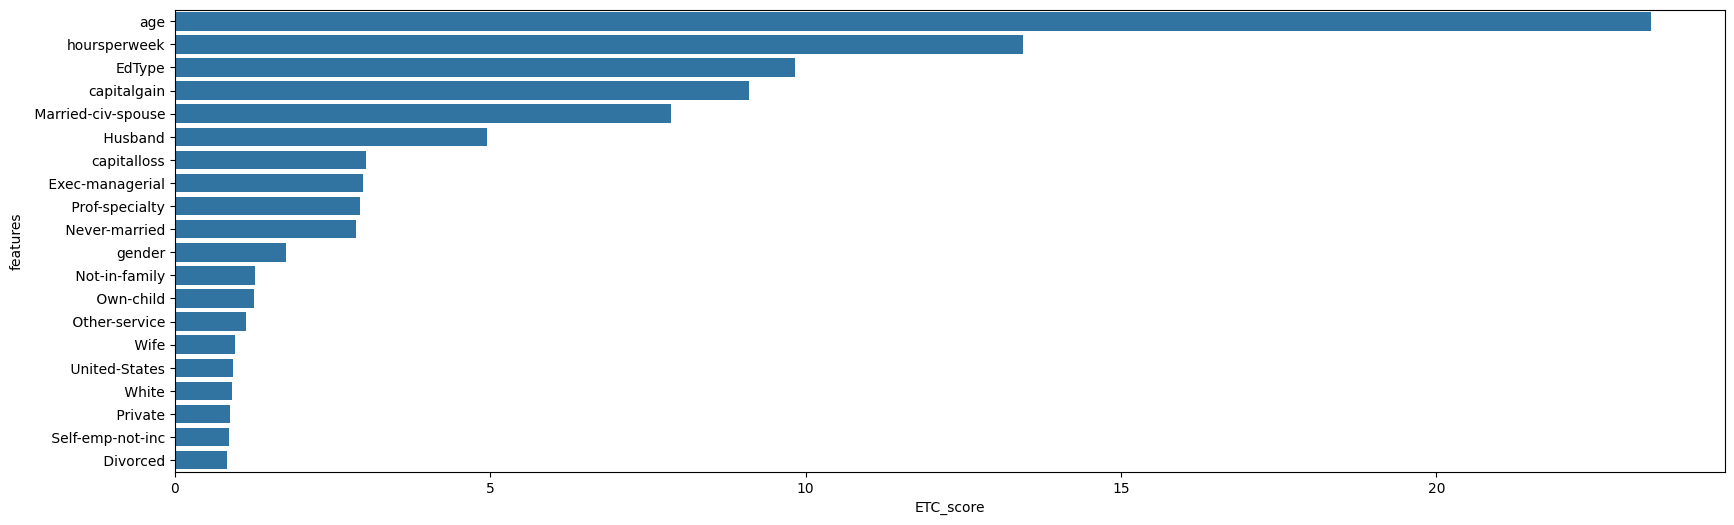

In [107]:
plt.figure(figsize=(20,6))
sns.barplot(x="ETC_score",y="features",data=Final_score_ETC)
print(Final_score_ETC.nlargest(10,"ETC_score"))

In [108]:
top_20_feature=[i for i in Final_score_ETC["features"].head(20)]

In [109]:
top_20_feature

['age',
 'hoursperweek',
 'EdType',
 'capitalgain',
 ' Married-civ-spouse',
 ' Husband',
 'capitalloss',
 ' Exec-managerial',
 ' Prof-specialty',
 ' Never-married',
 'gender',
 ' Not-in-family',
 ' Own-child',
 ' Other-service',
 ' Wife',
 ' United-States',
 ' White',
 ' Private',
 ' Self-emp-not-inc',
 ' Divorced']

# Feature Scaling

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler=StandardScaler()

In [112]:
x=df_new[top_20_feature]

In [113]:
df_scaled=scaler.fit_transform(x)

In [114]:
df_scaled

array([[ 0.6149865 , -1.1336487 , -0.63875682, ...,  0.64163555,
        -0.28487439,  2.46106414],
       [-1.12205549, -0.10452329, -0.63875682, ..., -1.55851714,
        -0.28487439, -0.4063283 ],
       [ 0.53227022, -0.10452329,  0.8421315 , ...,  0.64163555,
        -0.28487439, -0.4063283 ],
       ...,
       [-1.20477178, -0.10452329,  0.8421315 , ...,  0.64163555,
        -0.28487439, -0.4063283 ],
       [ 0.36683765, -0.10452329,  0.8421315 , ..., -1.55851714,
        -0.28487439, -0.4063283 ],
       [-0.70847406, -0.10452329,  0.8421315 , ...,  0.64163555,
        -0.28487439, -0.4063283 ]])

# BUILD ANN MODEL

In [115]:
y=df_new["SalStat"]

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df_scaled,y,test_size=0.25,random_state=0)


In [182]:
y_train

,SalStat
30215,1
28117,0
2151,0
11753,0
27647,0
...,...
13123,1
19648,0
9845,1
10799,0


In [218]:
# Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1)

In [219]:
X_train_tensor.shape

torch.Size([22721, 20])

In [220]:
y_train_tensor.shape

torch.Size([22721, 1])

In [221]:
# Define Model Parameters
input_size = X_train.shape[1]
hidden1 = 64
hidden2 = 32
learning_rate = 0.001

# Build Model
model = nn.Sequential(
    nn.Linear(input_size, hidden1),
    nn.ReLU(),
    nn.Linear(hidden1, hidden2),
    nn.ReLU(),
    nn.Linear(hidden2, 1),
    nn.Sigmoid()
)


In [222]:
model

Sequential(
  (0): Linear(in_features=20, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
  (5): Sigmoid()
)

In [223]:
# Define Loss Functions and Optimizer
criterion_bce = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Backward pass
        optimizer.zero_grad()  # Clear old gradients
        loss.backward()        # Calculate new gradients
        optimizer.step()       # Update model parameters

In [224]:
# Training Loop
epochs = 20
batch_size = 32
for epoch in range(epochs):
    model.train()
    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion_bce(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/20, Loss: 0.2321
Epoch 2/20, Loss: 0.2369
Epoch 3/20, Loss: 0.2385
Epoch 4/20, Loss: 0.2327
Epoch 5/20, Loss: 0.2327
Epoch 6/20, Loss: 0.2366
Epoch 7/20, Loss: 0.2265
Epoch 8/20, Loss: 0.2283
Epoch 9/20, Loss: 0.2188
Epoch 10/20, Loss: 0.2216
Epoch 11/20, Loss: 0.2267
Epoch 12/20, Loss: 0.2240
Epoch 13/20, Loss: 0.2229
Epoch 14/20, Loss: 0.2193
Epoch 15/20, Loss: 0.2197
Epoch 16/20, Loss: 0.2204
Epoch 17/20, Loss: 0.2194
Epoch 18/20, Loss: 0.2161
Epoch 19/20, Loss: 0.2177
Epoch 20/20, Loss: 0.2163


In [225]:
model.eval()

Sequential(
  (0): Linear(in_features=20, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
  (5): Sigmoid()
)

In [227]:
# Model Evaluation
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor).squeeze().numpy()
    y_pred = (y_pred_probs > 0.5).astype(int)

In [228]:
# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[5162  583]
 [ 610 1219]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      5745
           1       0.68      0.67      0.67      1829

    accuracy                           0.84      7574
   macro avg       0.79      0.78      0.78      7574
weighted avg       0.84      0.84      0.84      7574



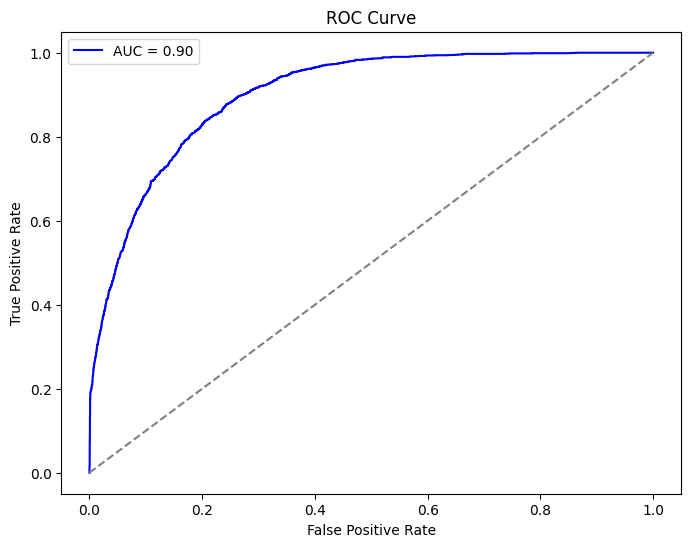

In [229]:
# AUC-ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [230]:
from itertools import product


In [231]:
# Hyperparameter Tuning
hidden_layer1_options = [32, 64]
hidden_layer2_options = [16, 32]
learning_rate_options = [0.01, 0.001]
epochs = 20
batch_size = 32

best_accuracy = 0
best_params = {}

for hidden1, hidden2, learning_rate in product(hidden_layer1_options, hidden_layer2_options, learning_rate_options):
    print(f"Training with hidden1={hidden1}, hidden2={hidden2}, learning_rate={learning_rate}")

    # Build Model
    model = nn.Sequential(
        nn.Linear(X_train.shape[1], hidden1),
        nn.ReLU(),
        nn.Linear(hidden1, hidden2),
        nn.ReLU(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
    )

    # Define Loss Functions and Optimizer
    criterion_bce = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training Loop
    for epoch in range(epochs):
        model.train()
        for i in range(0, len(X_train_tensor), batch_size):
            X_batch = X_train_tensor[i:i+batch_size]
            y_batch = y_train_tensor[i:i+batch_size]

            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion_bce(y_pred, y_batch)
            loss.backward()
            optimizer.step()

    # Evaluate on Test Data
    model.eval()
    with torch.no_grad():
        y_pred_probs = model(X_test_tensor).squeeze().numpy()
        y_pred = (y_pred_probs > 0.5).astype(int)

    # Calculate Accuracy
    accuracy = (y_pred == y_test).mean()
    print(f"Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {
            'hidden1': hidden1,
            'hidden2': hidden2,
            'learning_rate': learning_rate
        }

# Best Parameters
print(f"Best Parameters: {best_params}, Best Accuracy: {best_accuracy:.4f}")



Training with hidden1=32, hidden2=16, learning_rate=0.01
Accuracy: 0.8446
Training with hidden1=32, hidden2=16, learning_rate=0.001
Accuracy: 0.8426
Training with hidden1=32, hidden2=32, learning_rate=0.01
Accuracy: 0.8425
Training with hidden1=32, hidden2=32, learning_rate=0.001
Accuracy: 0.8434
Training with hidden1=64, hidden2=16, learning_rate=0.01
Accuracy: 0.8420
Training with hidden1=64, hidden2=16, learning_rate=0.001
Accuracy: 0.8396
Training with hidden1=64, hidden2=32, learning_rate=0.01
Accuracy: 0.8434
Training with hidden1=64, hidden2=32, learning_rate=0.001
Accuracy: 0.8428
Best Parameters: {'hidden1': 32, 'hidden2': 16, 'learning_rate': 0.01}, Best Accuracy: 0.8446


In [232]:
# Train Final Model with Best Parameters
hidden1 = best_params['hidden1']
hidden2 = best_params['hidden2']
learning_rate = best_params['learning_rate']

In [233]:
model = nn.Sequential(
    nn.Linear(X_train.shape[1], hidden1),
    nn.ReLU(),
    nn.Linear(hidden1, hidden2),
    nn.ReLU(),
    nn.Linear(hidden2, 1),
    nn.Sigmoid()
)

criterion_bce = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [237]:
epochs = 20
batch_size = 32
for epoch in range(epochs):
    model.train()
    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion_bce(y_pred, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/20, Loss: 0.1302
Epoch 2/20, Loss: 0.1369
Epoch 3/20, Loss: 0.1335
Epoch 4/20, Loss: 0.1316
Epoch 5/20, Loss: 0.1254
Epoch 6/20, Loss: 0.1351
Epoch 7/20, Loss: 0.1515
Epoch 8/20, Loss: 0.1472
Epoch 9/20, Loss: 0.1617
Epoch 10/20, Loss: 0.1607
Epoch 11/20, Loss: 0.1628
Epoch 12/20, Loss: 0.1693
Epoch 13/20, Loss: 0.1758
Epoch 14/20, Loss: 0.1543
Epoch 15/20, Loss: 0.1848
Epoch 16/20, Loss: 0.1776
Epoch 17/20, Loss: 0.1716
Epoch 18/20, Loss: 0.1602
Epoch 19/20, Loss: 0.1717
Epoch 20/20, Loss: 0.1543


In [238]:
# Final Evaluation
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor).squeeze().numpy()
    y_pred = (y_pred_probs > 0.5).astype(int)


In [239]:
# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Confusion Matrix:
[[5354  391]
 [ 797 1032]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5745
           1       0.73      0.56      0.63      1829

    accuracy                           0.84      7574
   macro avg       0.80      0.75      0.77      7574
weighted avg       0.84      0.84      0.84      7574



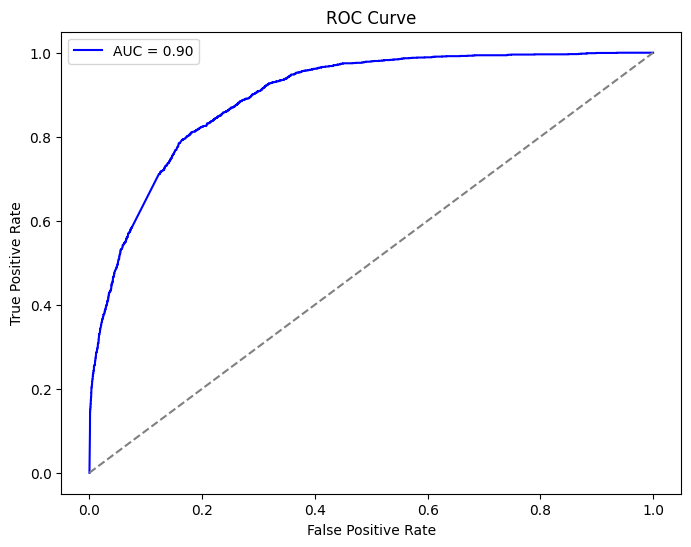

In [240]:
# AUC-ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()